## import packages

In [25]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

### connect to SQL

In [26]:
conn = sqlite3.connect('../data/wdi_data.db')  

## fertility_rate
### table

In [27]:
# SQL query
query = """
SELECT 
    country,
    fertility_rate,
    (adolescent_fertility_rate/1000) AS ado_fertility_rate
FROM wdi_data
WHERE fertility_rate IS NOT NULL AND adolescent_fertility_rate IS NOT NULL
ORDER BY fertility_rate DESC;
"""
df1 = pd.read_sql_query(query, conn)

display(pd.read_sql(query, conn))

,country,fertility_rate,ado_fertility_rate
0,Mexico,1.940,0.061111
1,Colombia,1.663,0.060175
2,Brazil,1.629,0.042881
3,Argentina,1.482,0.025767


### plot

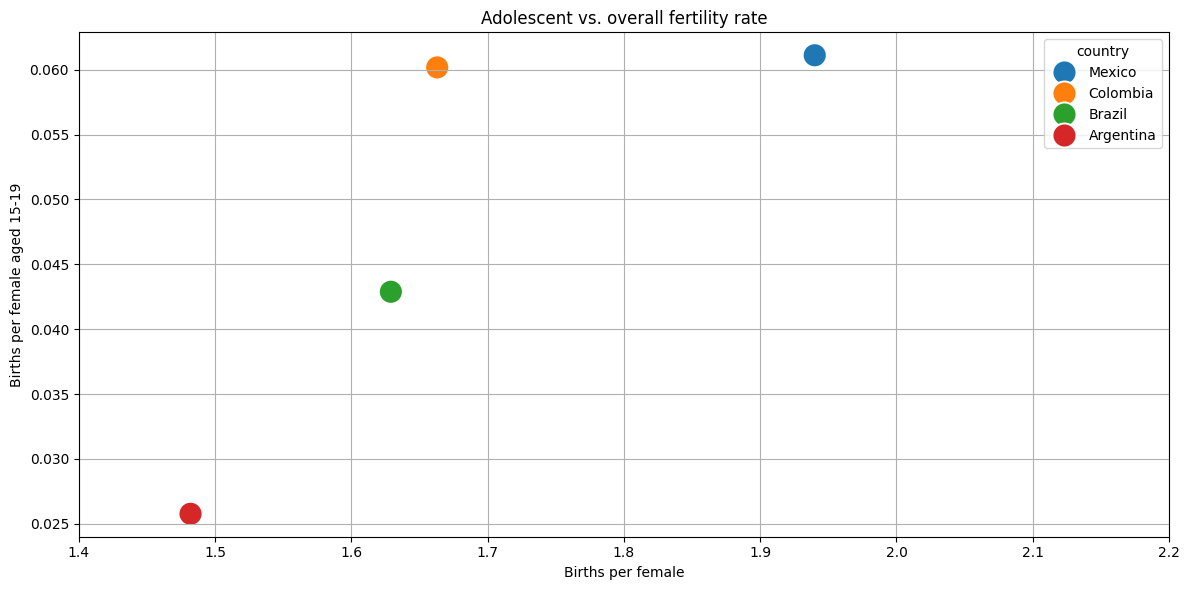

In [28]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df1, 
    x='fertility_rate', y='ado_fertility_rate', 
    hue='country',
    s = 300
)

plt.grid(True)
plt.xlim(1.4, 2.2)
plt.title('Adolescent vs. overall fertility rate')
plt.ylabel('Births per female aged 15-19')
plt.xlabel('Births per female')
plt.tight_layout()
plt.savefig('../figures/fertility_rate.png')

## mortality_density
### table

In [29]:
# SQL query
query = """
SELECT 
    country,
    population_density,
    under_5_mortality_rate
FROM wdi_data
WHERE population_density IS NOT NULL AND under_5_mortality_rate IS NOT NULL
ORDER BY under_5_mortality_rate;
"""
df2 = pd.read_sql_query(query, conn)

display(pd.read_sql(query, conn))

,country,population_density,under_5_mortality_rate
0,Argentina,16.592272,9.8
1,Colombia,46.631766,12.4
2,Mexico,66.160712,12.9
3,Brazil,25.161868,14.6


### plot

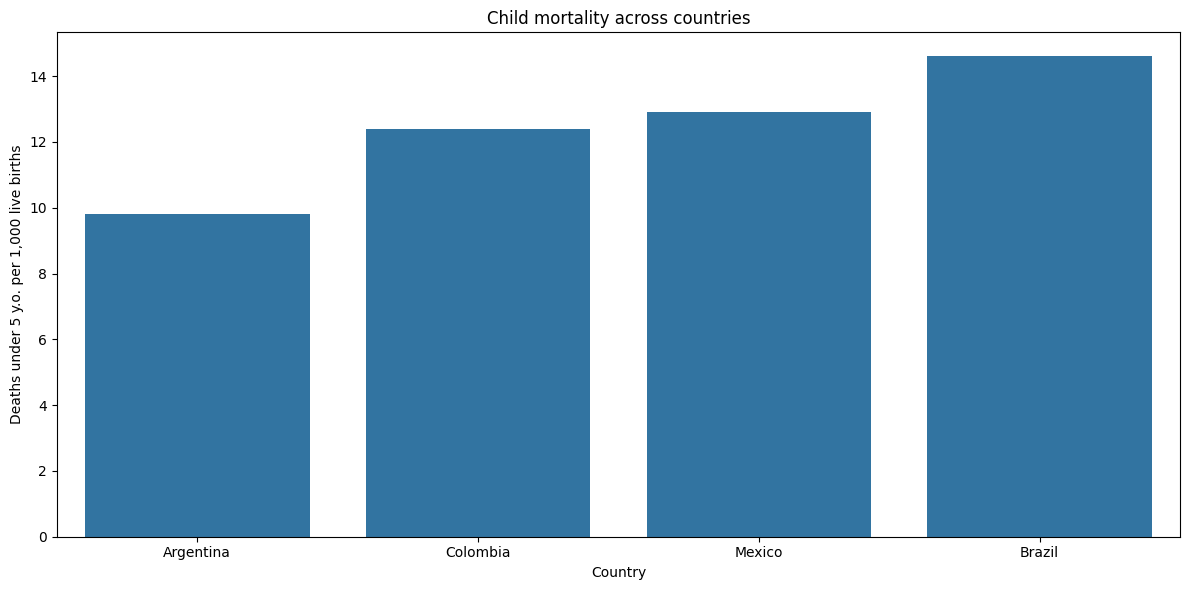

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df2, 
    x='country', y='under_5_mortality_rate'
)

plt.title('Child mortality across countries')
plt.ylabel('Deaths under 5 y.o. per 1,000 live births')
plt.xlabel('Country')
plt.tight_layout()
plt.savefig('../figures/child_mortality.png')

## pop_decline
### table

In [31]:
# SQL query
query = """
SELECT 
    country,
    birth_rate,
    death_rate,
    (birth_rate - death_rate) AS circle_of_life
FROM wdi_data
WHERE birth_rate IS NOT NULL AND death_rate IS NOT NULL
ORDER BY circle_of_life ASC;
"""
df3 = pd.read_sql_query(query, conn)

display(pd.read_sql(query, conn))

,country,birth_rate,death_rate,circle_of_life
0,Argentina,10.926,8.797,2.129
1,Brazil,12.555,7.539,5.016
2,Colombia,13.731,5.881,7.850
3,Mexico,16.041,6.521,9.520


### plot

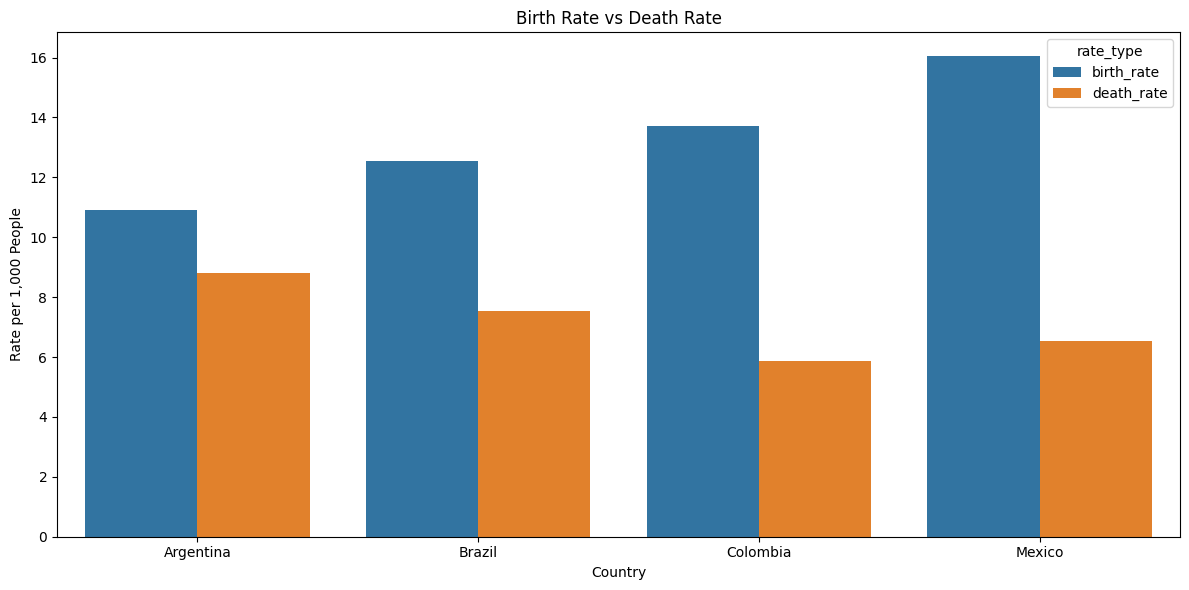

In [32]:
# Melt the dataframe to long format
df_melted = pd.melt(
    df3, 
    id_vars='country', 
    value_vars=['birth_rate', 'death_rate'], 
    var_name='rate_type', 
    value_name='rate'
)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_melted, 
    x='country', y='rate', 
    hue='rate_type'
)

plt.title('Birth Rate vs Death Rate')
plt.ylabel('Rate per 1,000 People')
plt.xlabel('Country')
plt.tight_layout()
plt.savefig('../figures/pop_decline.png')

## pop_growth
### table

In [33]:
# SQL query
query = """
SELECT 
    country,
    urban_population_percent,
    rural_population_percent,
    population_growth
FROM wdi_data
WHERE 
    urban_population_percent IS NOT NULL 
    AND population_growth IS NOT NULL
"""
df4 = pd.read_sql_query(query, conn)

display(pd.read_sql(query, conn))

,country,urban_population_percent,rural_population_percent,population_growth
0,Colombia,82.050,17.950,1.068293
1,Argentina,92.347,7.653,0.210809
2,Mexico,81.300,18.700,0.753117
3,Brazil,87.555,12.445,0.360181


### plot

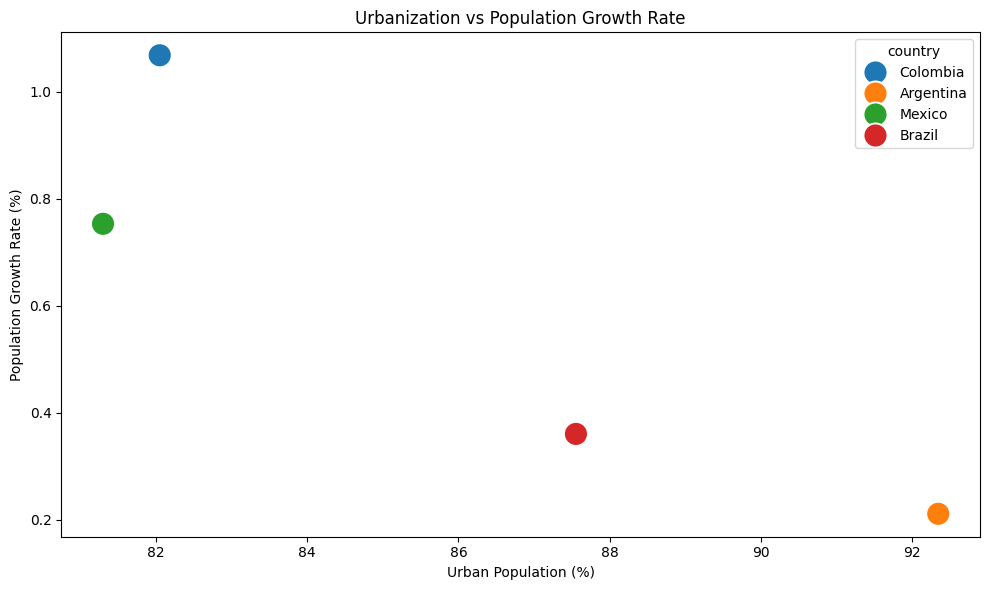

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df4,
    x="urban_population_percent",
    y="population_growth",
    hue="country",
    s = 300
)

plt.xlabel("Urban Population (%)")
plt.ylabel("Population Growth Rate (%)")
plt.title("Urbanization vs Population Growth Rate")
plt.tight_layout()
plt.savefig('../figures/pop_growth.png')